In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Unnamed: 0     TV  Radio  Newspaper  Sales
0         False  False  False      False  False
1         False  False  False      False  False
2         False  False  False      False  False
3         False  False  False      False  False
4         False  False  False      False  False
..          ...    ...    ...        ...    ...
195       False  False  False      False  False
196       False  False  False      False  False
197       False  False  False      False  False
198       False  False  False      False  False
199       False  False  False      False  False

[200 rows x 5 columns]>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

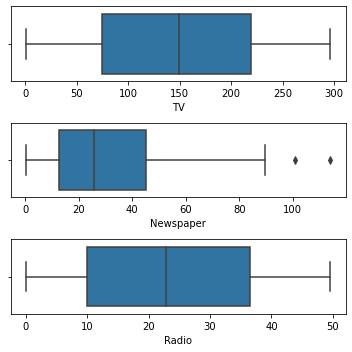

In [10]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Newspaper'], ax=axs[1])
plt3=sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

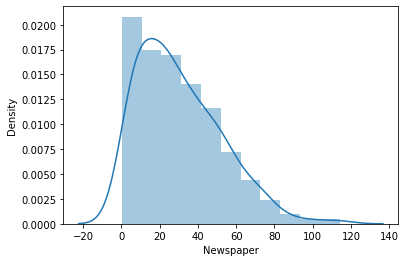

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr= df.Newspaper.quantile(0.75)- df.Newspaper.quantile(0.25)

In [13]:
lower_bridge=df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


<AxesSubplot:xlabel='Newspaper'>

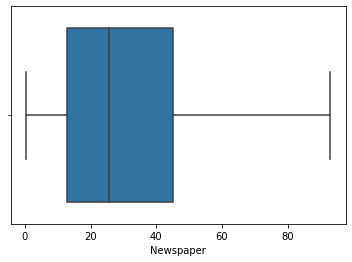

In [14]:
data =df.copy()
     

data.loc[data["Newspaper"]>=93, "Newspaper"]=93
     

sns.boxplot(data["Newspaper"])
     

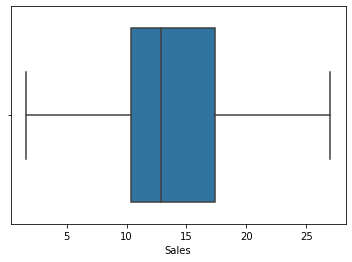

In [15]:
sns.boxplot(data["Sales"]);

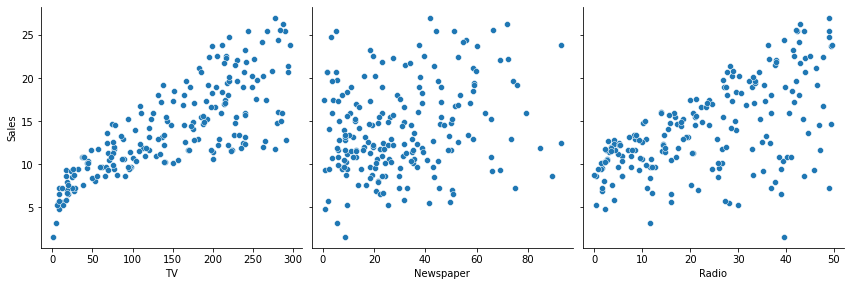

In [16]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

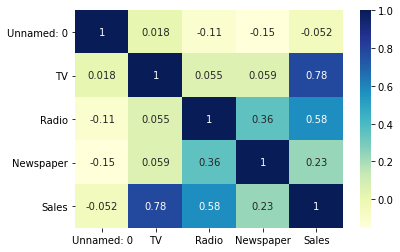

In [17]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [18]:
important_features= list(df.corr()["Sales"][(df.corr()["Sales"]>+0.5)|(df.corr()["Sales"]<-0.5)].index)

In [19]:
  print(important_features)
  

['TV', 'Radio', 'Sales']


In [20]:
x=data['TV']
y=data['Sales']

In [21]:
X=x.values.reshape(-1,1)

Splitting Training And Testing Data

In [23]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [24]:
print(X.shape,y.shape)

(200, 1) (200,)


# model training

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)


In [26]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [27]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
     

knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [28]:
knn_train_pred = knn.predict(X_train)
     

knn_test_pred = knn.predict(X_test)
     

print(knn_train_pred, knn_test_pred)

[11.12 12.12 16.12 17.52 18.3  17.54 14.58 11.04 11.86 13.82 18.1   6.32
 13.96 11.86 17.54 19.06 16.12 19.28 15.3  11.78 18.3  13.82 18.44 13.88
 21.62 13.82 17.54 16.76 11.86  9.66 10.9  10.9  17.5  11.04  6.96 19.96
 19.58 10.9  16.62  6.32 17.7  19.72 14.7  17.22 19.72  8.18 16.12  8.64
 17.54 11.12  6.96 13.58 18.78 16.76 14.84 10.72 13.58  7.18 12.86 20.34
 16.34 18.84 17.18 14.7  12.86  8.64 11.44 18.1  17.6  21.92  9.9   9.94
  9.58 11.44  6.32 21.92 18.62  9.66 15.9  18.72 15.72 11.36  6.94 17.52
 14.56  8.64 17.54 16.12 16.36 20.34 19.28 17.52 10.9  11.44 20.24 10.04
 11.12 11.12  6.96 12.22 17.54 16.34 18.3  12.86  7.18 13.58 19.06 17.4
 16.94 10.04 19.76 18.3  10.2   6.12  8.2  13.58 18.78 13.38 15.72 12.2
  9.92 17.54 13.38 16.94 11.44 18.78  8.4  21.62  7.18  8.66 10.04  6.32
 18.72  8.64] [12.7  12.86 12.86 21.62  6.32 18.62  6.94 10.58 17.6  11.86 10.96 11.44
 10.14 10.9   9.9   6.32 10.9  15.9  12.78 16.38 17.54  6.32 15.9  18.78
 13.58 17.76 12.86 16.76 12.12 21.92 13

In [29]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])
     

In [30]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5893804123151789
RMSE: 3.203790368808909


In [31]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.640416,0.58938,3.20379,0.051036


In [32]:
import statsmodels.api as sm
     

X_train_constant = sm.add_constant(X_train)

     

model = sm.OLS(y_train, X_train_constant).fit()

In [33]:
model.params

const    7.158245
x1       0.045810
dtype: float64

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.40e-27
Time:                        19:21:43   Log-Likelihood:                -353.86
No. Observations:                 134   AIC:                             711.7
Df Residuals:                     132   BIC:                             717.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1582      0.583     12.274      0.0

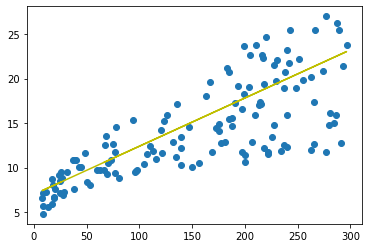

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()


In [36]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

49    -0.522945
19     0.693917
50    -4.911117
104    2.629772
39     3.897036
         ...   
66     0.898735
190    1.832253
8     -2.752213
92     2.268881
136    1.169015
Name: Sales, Length: 134, dtype: float64

In [37]:

y_train_pred

array([10.22294544, 13.90608309, 16.311117  , 18.07022751, 17.60296378,
       15.62854547, 17.50218141, 10.52071154, 10.65814205, 15.1796058 ,
       19.83391905,  7.51556441, 12.91658342, 10.65814205, 19.20173871,
       20.3332499 , 16.311117  , 17.02575564, 16.50810073, 14.02060851,
       17.56631565, 15.20709191, 16.76005666, 13.19144444, 18.65201667,
       15.26664513, 19.32542616, 15.76139496, 10.59858883,  9.37087628,
       11.54227833, 11.61099358, 15.91256852, 10.01221866,  8.01489526,
       19.69648854, 16.9341353 , 11.62473663, 15.44072377,  7.55679356,
       16.03167496, 18.23056311, 17.34642683, 17.90072989, 18.29927836,
        8.38595763, 16.26988784,  8.30808034, 19.19257667, 10.29166069,
        8.05612441, 12.70127562, 18.1481048 , 15.76597598, 14.64820783,
       11.94998884, 15.06049936,  7.97824712, 13.53502071, 20.42945126,
       16.21033462, 16.6363692 , 15.52318208, 17.34642683, 13.54876376,
        8.30349933, 12.18820172, 19.84308108, 20.18207634, 20.57

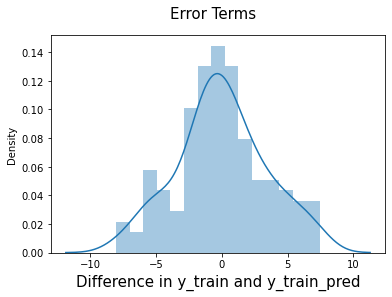

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

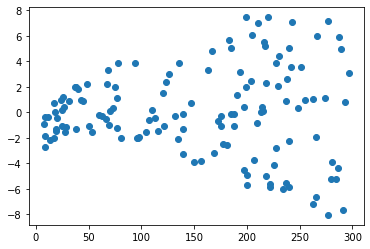

In [39]:
plt.scatter(X_train, res)
plt.show()

In [40]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

y_pred

array([14.0984858 , 13.5854119 , 13.3975902 , 18.53749125,  7.49265932,
       18.78486616,  7.75835831, 11.20328307, 20.15000922, 10.6169129 ,
       10.1862973 , 12.22943087, 11.86294952, 11.75758612,  9.12808238,
        7.34606678, 11.47356307, 17.22732039, 12.52719698, 16.43480445,
       19.12844244,  7.40562   , 17.25938751, 18.15726684, 12.66462749,
       20.04922685, 13.47546749, 15.78888106, 13.70451834, 20.60811092,
       15.26664513,  9.19679764, 14.01602749, 14.74440919, 13.63122207,
       12.18820172, 11.56518341, 10.32830883, 13.08608105, 11.26741731,
       15.00552716, 17.4197231 , 16.10955225, 18.1206187 , 16.00876988,
       11.08417663, 11.15289188, 17.16318615,  8.01947627, 13.16395834,
       14.6390458 , 14.694018  ,  7.94618   , 14.95513597,  9.79232984,
       16.93871632, 17.61670683, 10.60775086, 16.81044785,  7.1903122 ,
       17.79078548, 16.63178818, 11.29948443, 10.58026476,  9.73277662,
       10.65356103])

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
     

np.sqrt(mean_squared_error(y_test, y_pred))

2.931793406323925

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.6561427329263779

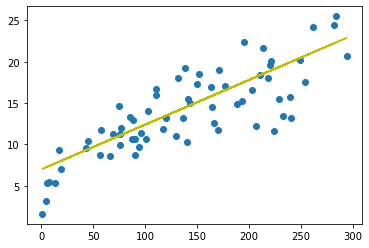

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()